In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Конфигурация вейвлет-базисов
WAVELET_BASES = [
    ("haar", "Вейвлет Хаара"),
    ("shannon", "Вейвлет Шеннона"),
    ("d6", "Вейвлет Добеши (D6)"),
]

RESULTS_DIR = "wavelet_results_piecewise"

def read_csv_file(filename):
    """Чтение CSV файла"""
    filepath = os.path.join(RESULTS_DIR, filename)
    if os.path.exists(filepath):
        return pd.read_csv(filepath)
    return None

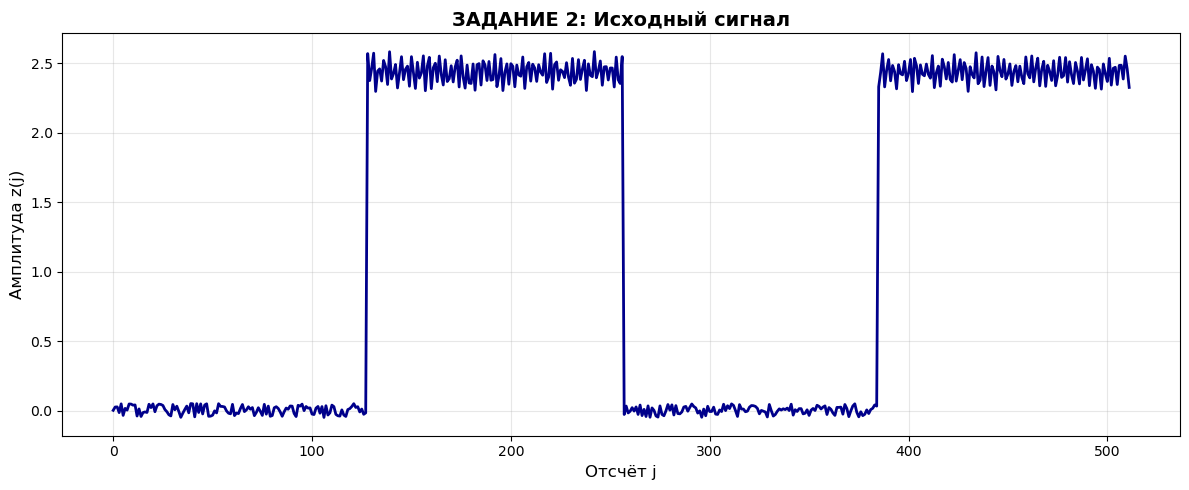

In [3]:
# ============================================================================
# ЗАДАНИЕ 2: Визуализация исходного сигнала
# ============================================================================
original_signal = read_csv_file("original_signal.csv")
if original_signal is not None:
    N = len(original_signal)
    quarter = N // 4
    
    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(original_signal['sample_index'], original_signal['real_component'], 
           linewidth=2, color='darkblue')
    
    ax.set_title(f"ЗАДАНИЕ 2: Исходный сигнал", 
                 fontsize=14, fontweight='bold')
    ax.set_xlabel("Отсчёт j", fontsize=12)
    ax.set_ylabel("Амплитуда z(j)", fontsize=12)
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

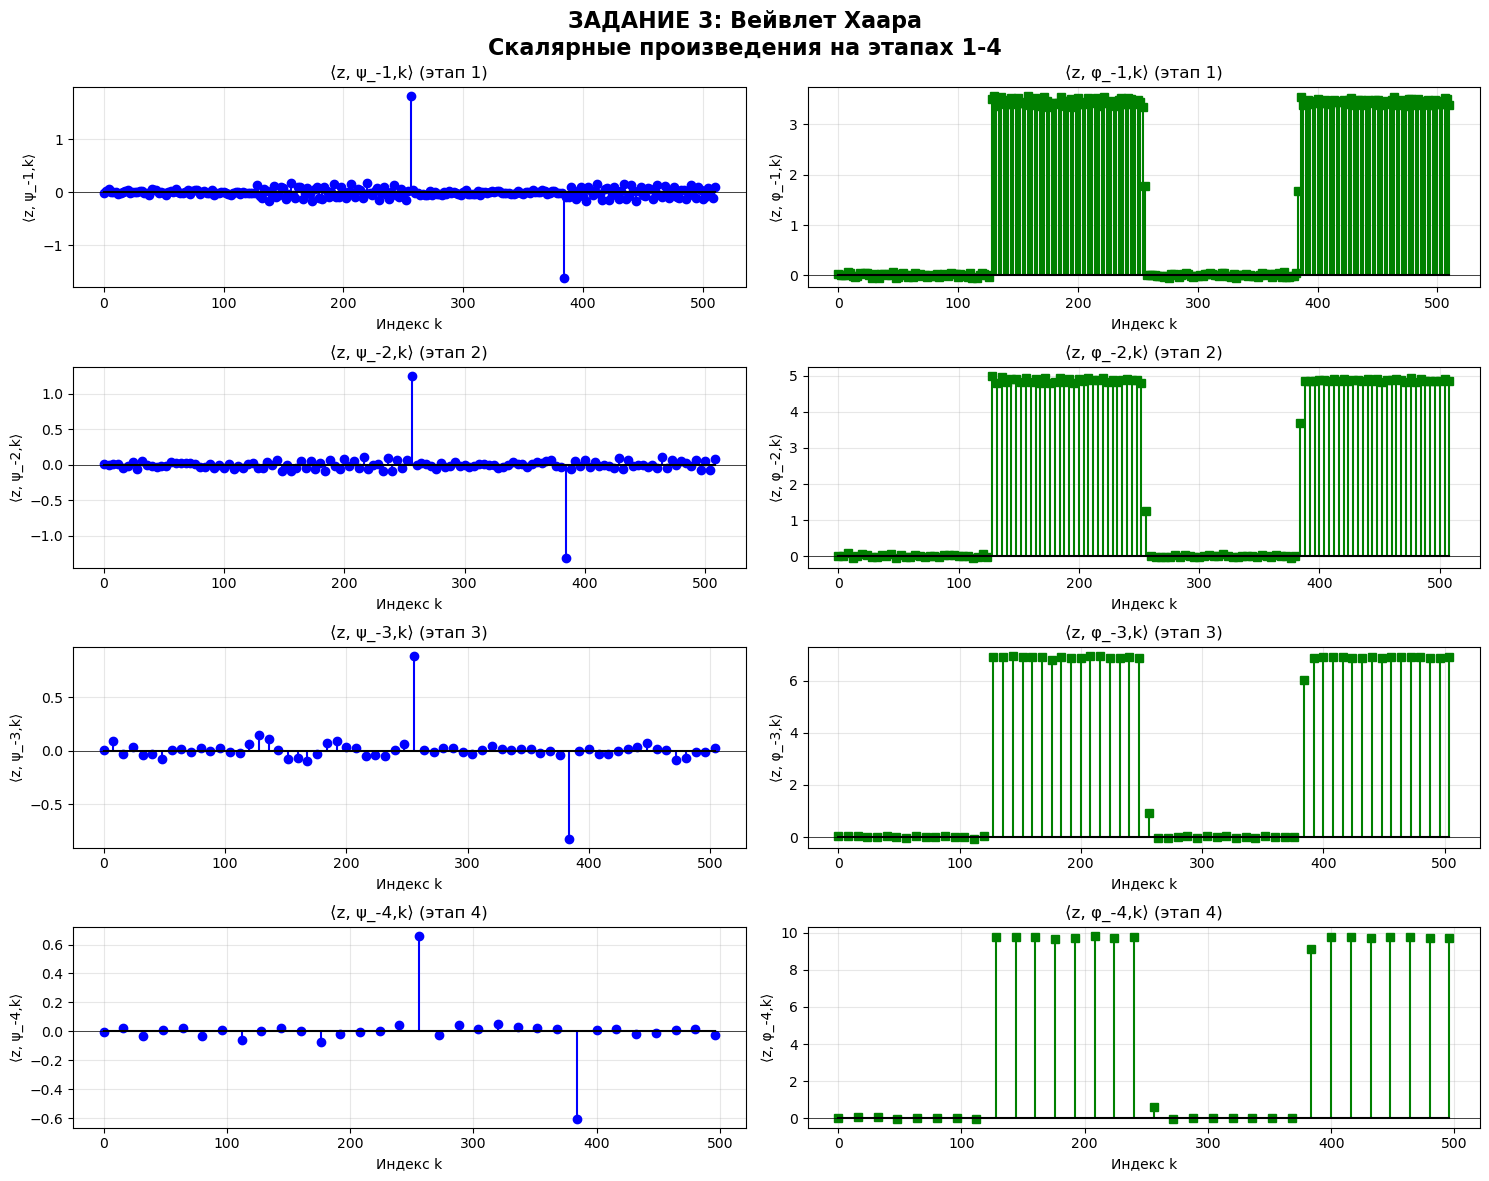

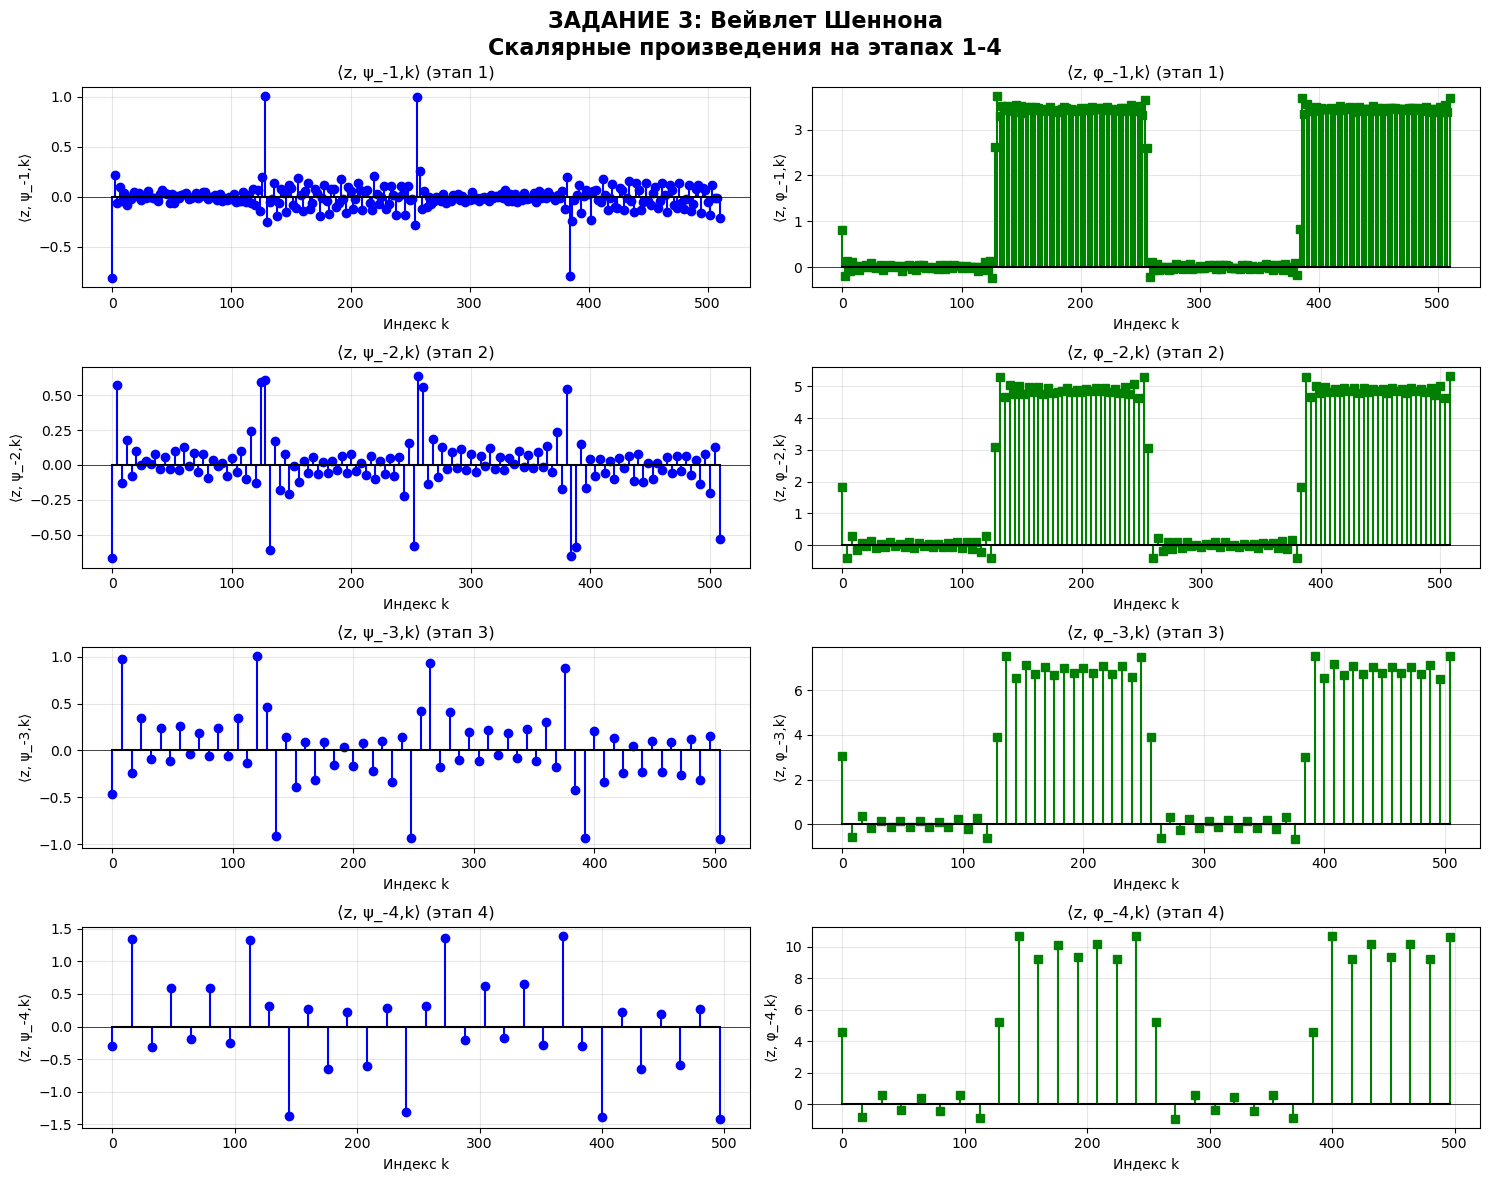

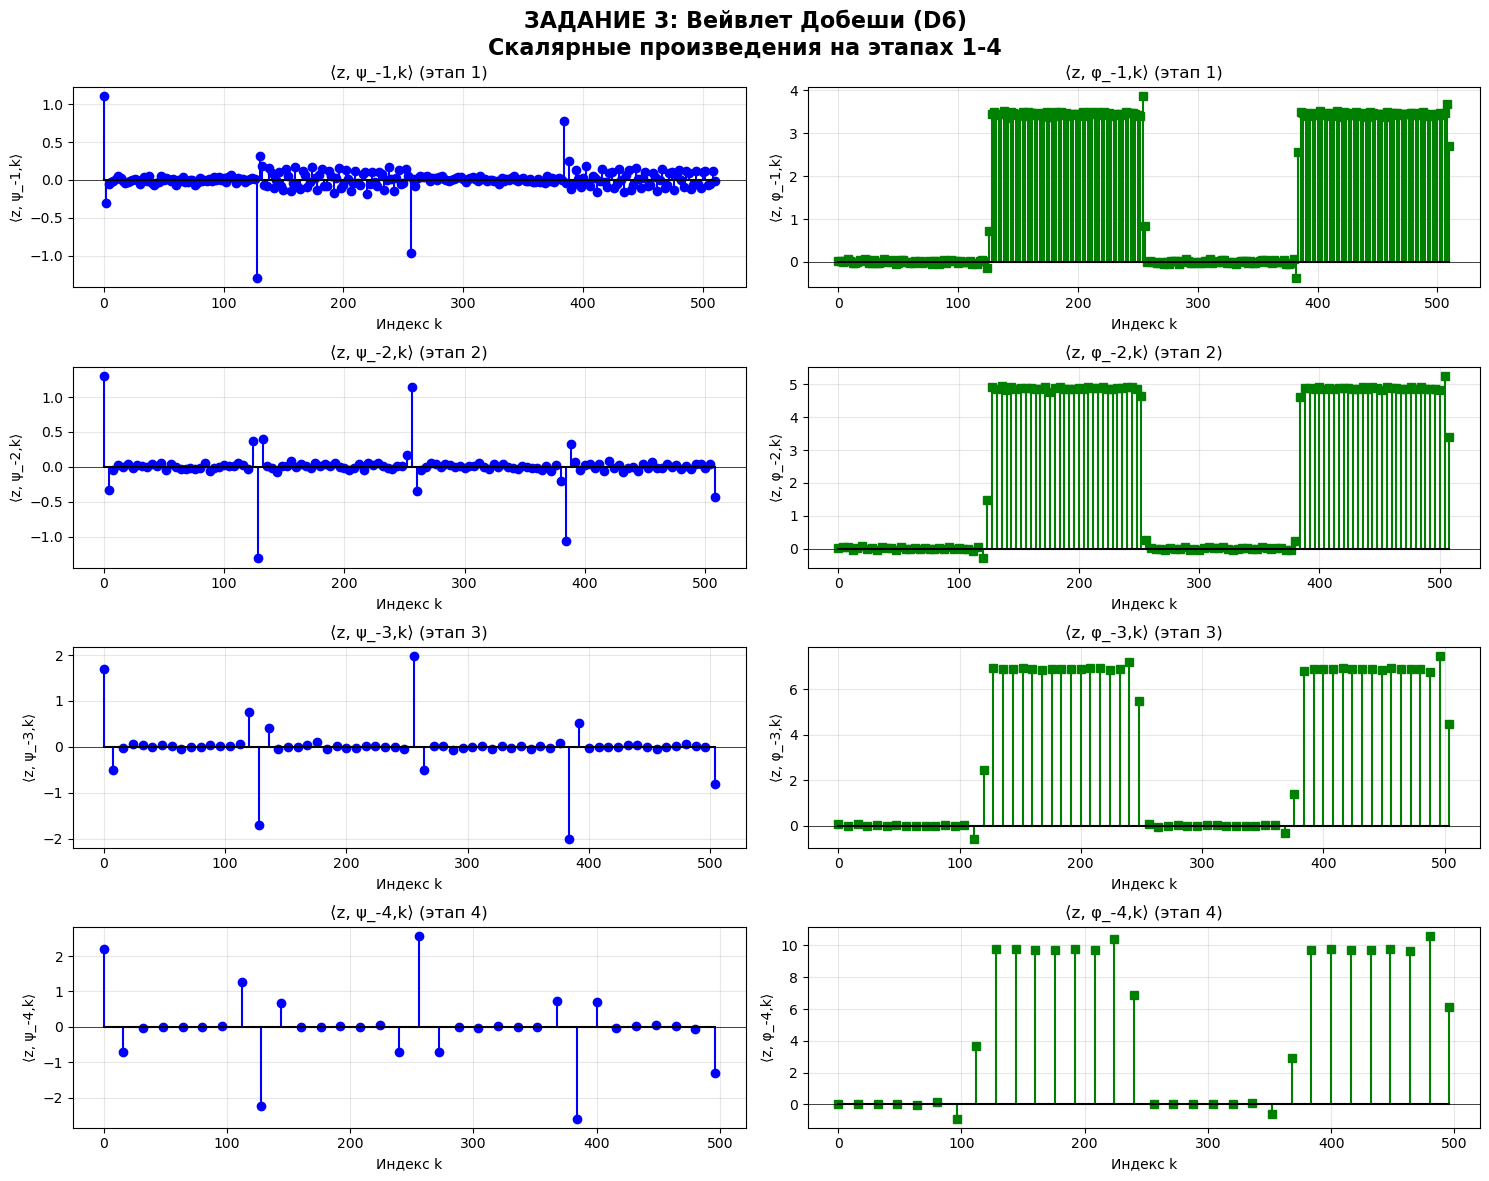

In [4]:
# ============================================================================
# ЗАДАНИЕ 3: Скалярные произведения ⟨z, ψ_{-m,k}⟩ и ⟨z, φ_{-4,k}⟩
# ============================================================================
for basis_name, basis_title in WAVELET_BASES:
    fig, axes = plt.subplots(4, 2, figsize=(15, 12))
    fig.suptitle(f"ЗАДАНИЕ 3: {basis_title}\nСкалярные произведения на этапах 1-4", 
                 fontsize=16, fontweight='bold')
    
    for level in range(1, 5):
        row_idx = level - 1
        coeffs_data = read_csv_file(f"coeffs_initial_{basis_name}_level{level}.csv")
        
        if coeffs_data is not None:
            # График 1: ⟨z, ψ_{-m,k}⟩ для m = 1,2,3,4
            axes[row_idx, 0].stem(coeffs_data['sample_position'], coeffs_data['detail_real'],
                                 linefmt='b-', markerfmt='bo', basefmt='k-')
            axes[row_idx, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
            axes[row_idx, 0].set_title(f"⟨z, ψ_{-level},k⟩ (этап {level})", fontsize=12)
            axes[row_idx, 0].set_xlabel("Индекс k")
            axes[row_idx, 0].set_ylabel(f"⟨z, ψ_{-level},k⟩")
            axes[row_idx, 0].grid(True, alpha=0.3)
            
            # График 2: ⟨z, φ_{-4,k}⟩ только для 4-го этапа, для остальных ⟨z, φ_{-m,k}⟩
            axes[row_idx, 1].stem(coeffs_data['sample_position'], coeffs_data['approx_real'],
                                 linefmt='g-', markerfmt='gs', basefmt='k-')
            axes[row_idx, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
            if level == 4:
                axes[row_idx, 1].set_title(f"⟨z, φ_{-level},k⟩ (этап {level})", fontsize=12)
            else:
                axes[row_idx, 1].set_title(f"⟨z, φ_{-level},k⟩ (этап {level})", fontsize=12)
            axes[row_idx, 1].set_xlabel("Индекс k")
            axes[row_idx, 1].set_ylabel(f"⟨z, φ_{-level},k⟩")
            axes[row_idx, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

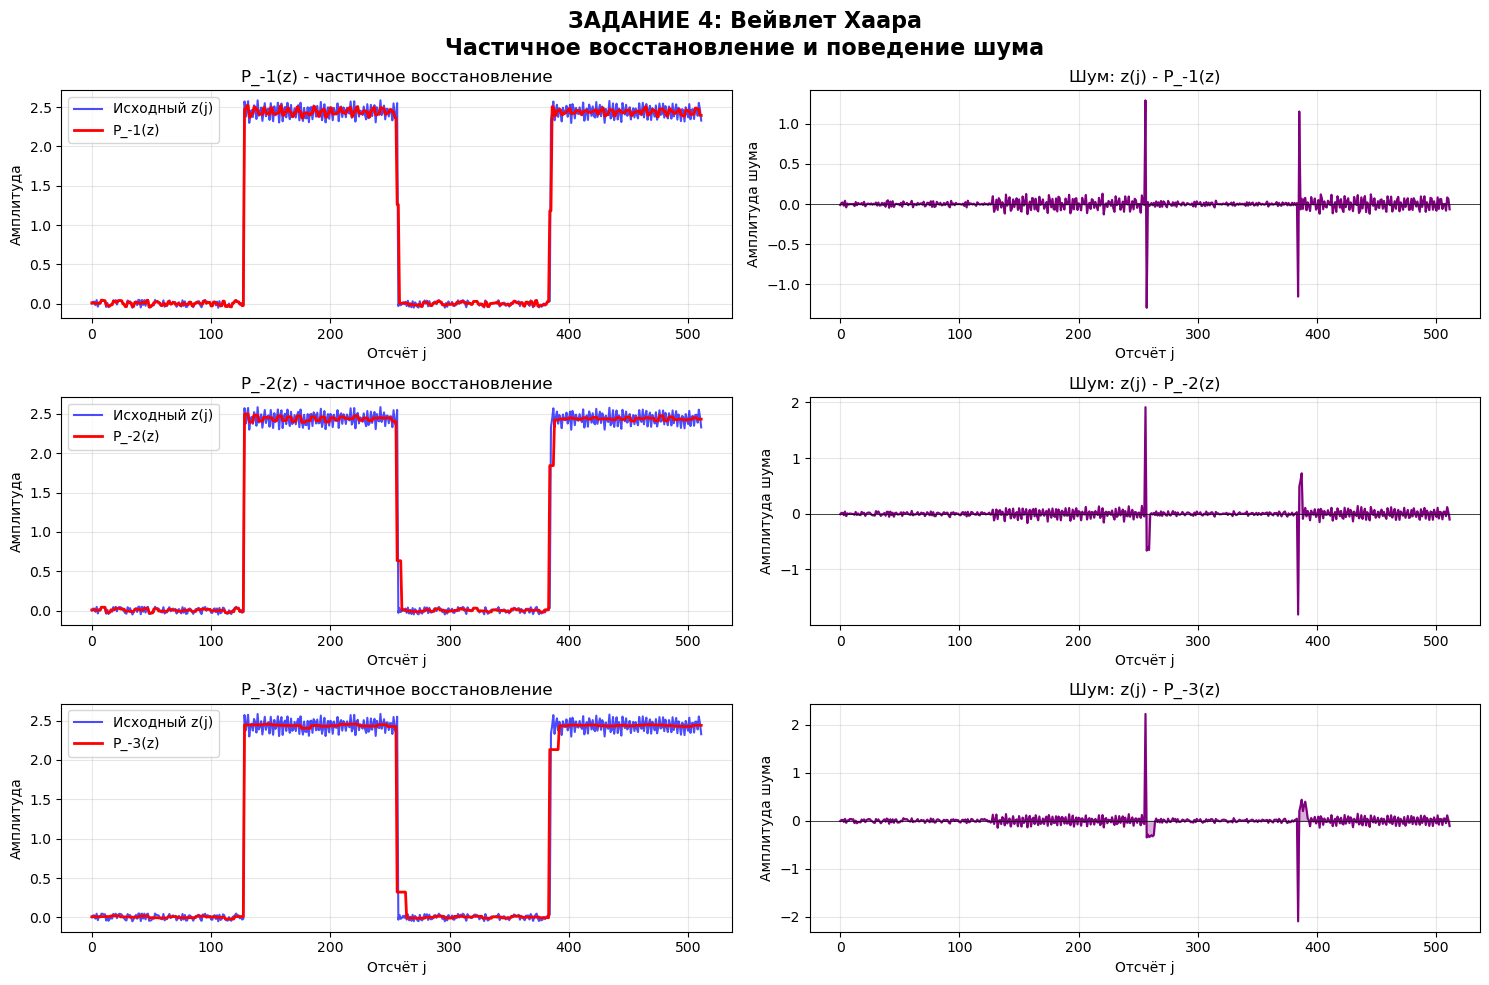

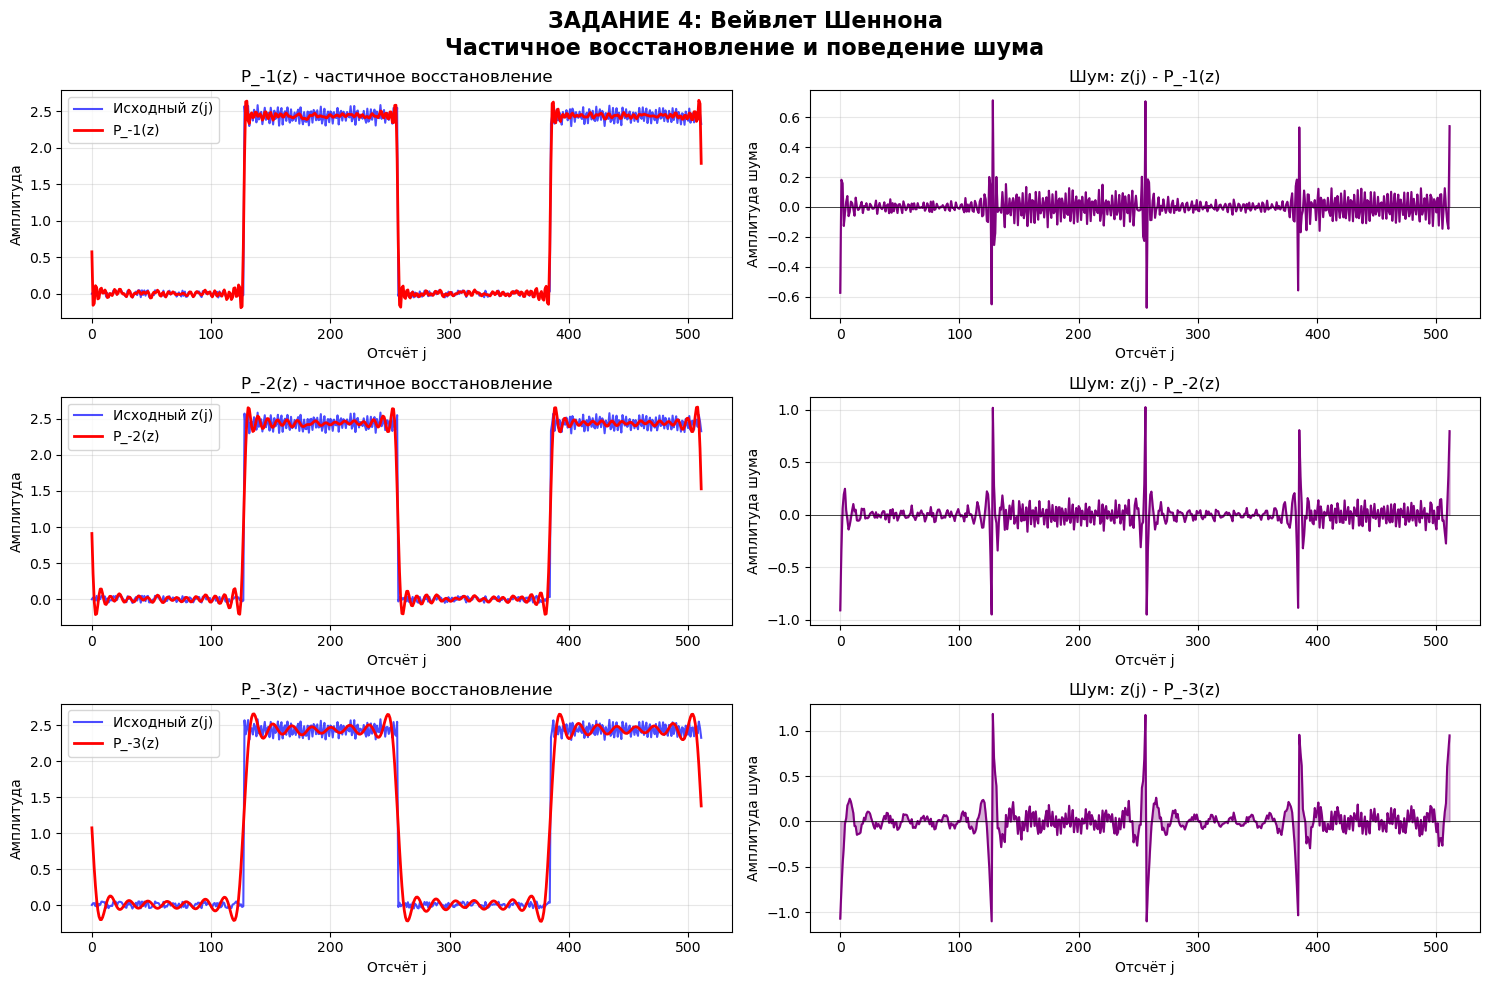

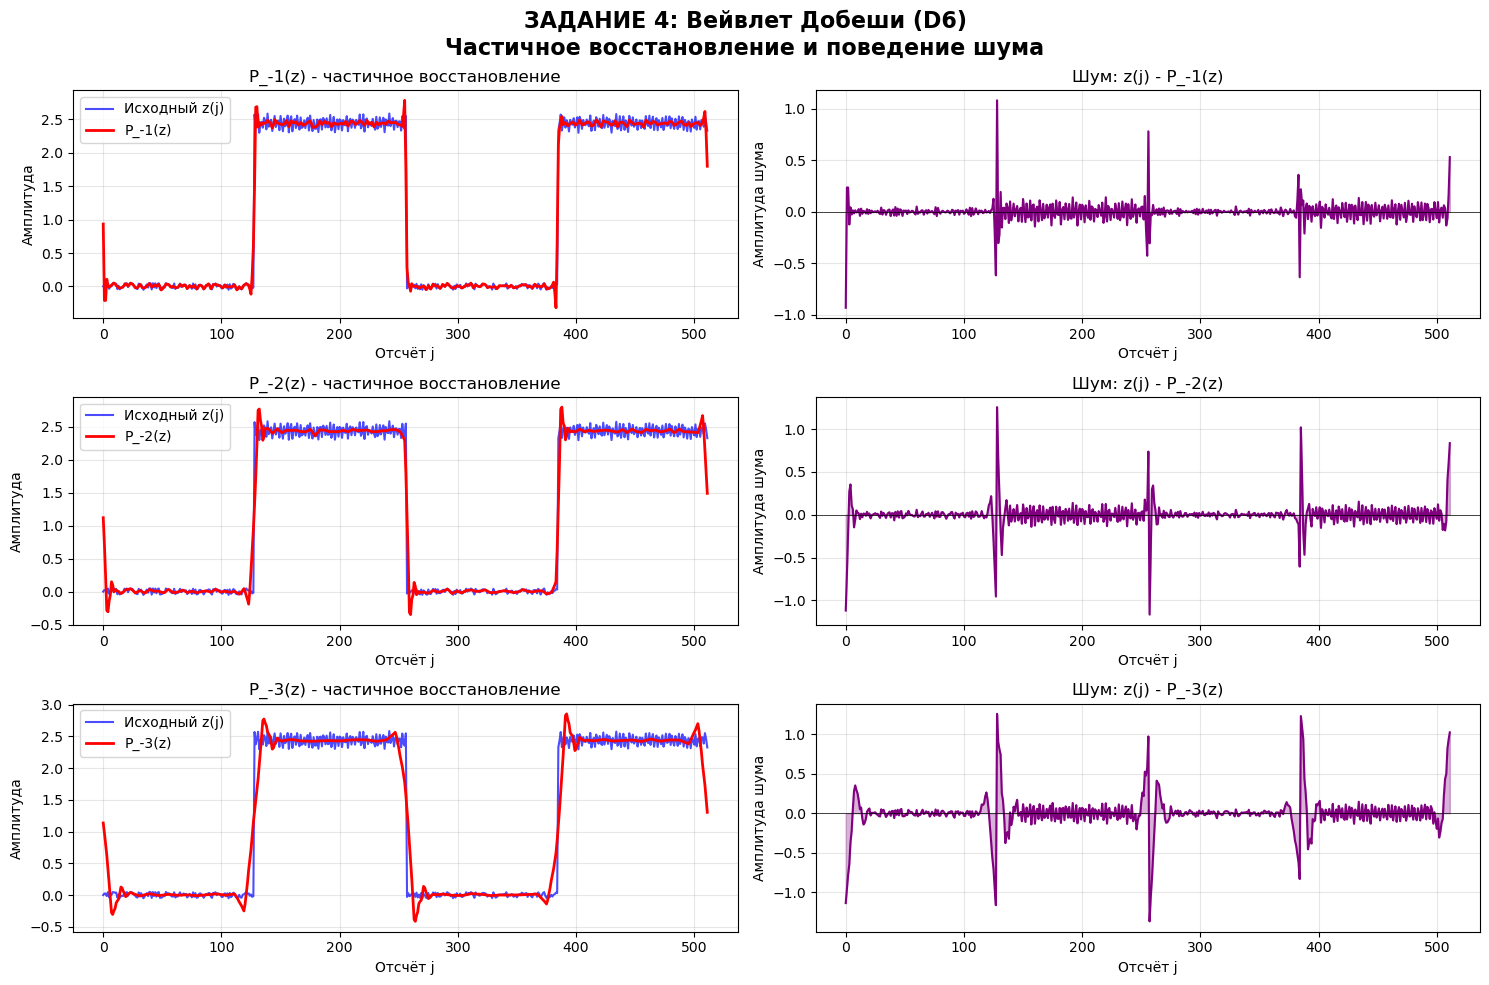

In [5]:
# ============================================================================
# ЗАДАНИЕ 4: Частичное восстановление P_{-1}(z), P_{-2}(z), P_{-3}(z)
# ============================================================================
for basis_name, basis_title in WAVELET_BASES:
    fig, axes = plt.subplots(3, 2, figsize=(15, 10))
    fig.suptitle(f"ЗАДАНИЕ 4: {basis_title}\nЧастичное восстановление и поведение шума", 
                 fontsize=16, fontweight='bold')
    
    noise_levels = []  # Для графика изменения шума
    stages_list = []   # Список этапов
    
    for level_idx, level in enumerate([1, 2, 3]):
        data = read_csv_file(f"filtering_results_{basis_name}_level{level}.csv")
        
        if data is not None:
            # График 1: Частичное восстановление P_{-m}(z)
            ax_left = axes[level_idx, 0]
            ax_left.plot(data['sample_index'], data['original_real'], 
                        linewidth=1.5, alpha=0.7, color='blue', label='Исходный z(j)')
            ax_left.plot(data['sample_index'], data['filtered_real'], 
                        linewidth=2, color='red', label=f'P_{-level}(z)')
            ax_left.set_title(f"P_{-level}(z) - частичное восстановление", fontsize=12)
            ax_left.set_xlabel("Отсчёт j")
            ax_left.set_ylabel("Амплитуда")
            ax_left.legend(fontsize=10)
            ax_left.grid(True, alpha=0.3)
            
            # График 2: Разность (шум) z(j) - P_{-m}(z)
            ax_right = axes[level_idx, 1]
            residual = data['original_real'] - data['filtered_real']
            ax_right.plot(data['sample_index'], residual, 
                         linewidth=1.5, color='purple')
            ax_right.fill_between(data['sample_index'], 0, residual, alpha=0.3, color='purple')
            ax_right.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
            
            ax_right.set_title(f"Шум: z(j) - P_{-level}(z)", fontsize=12)
            ax_right.set_xlabel("Отсчёт j")
            ax_right.set_ylabel("Амплитуда шума")
            ax_right.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

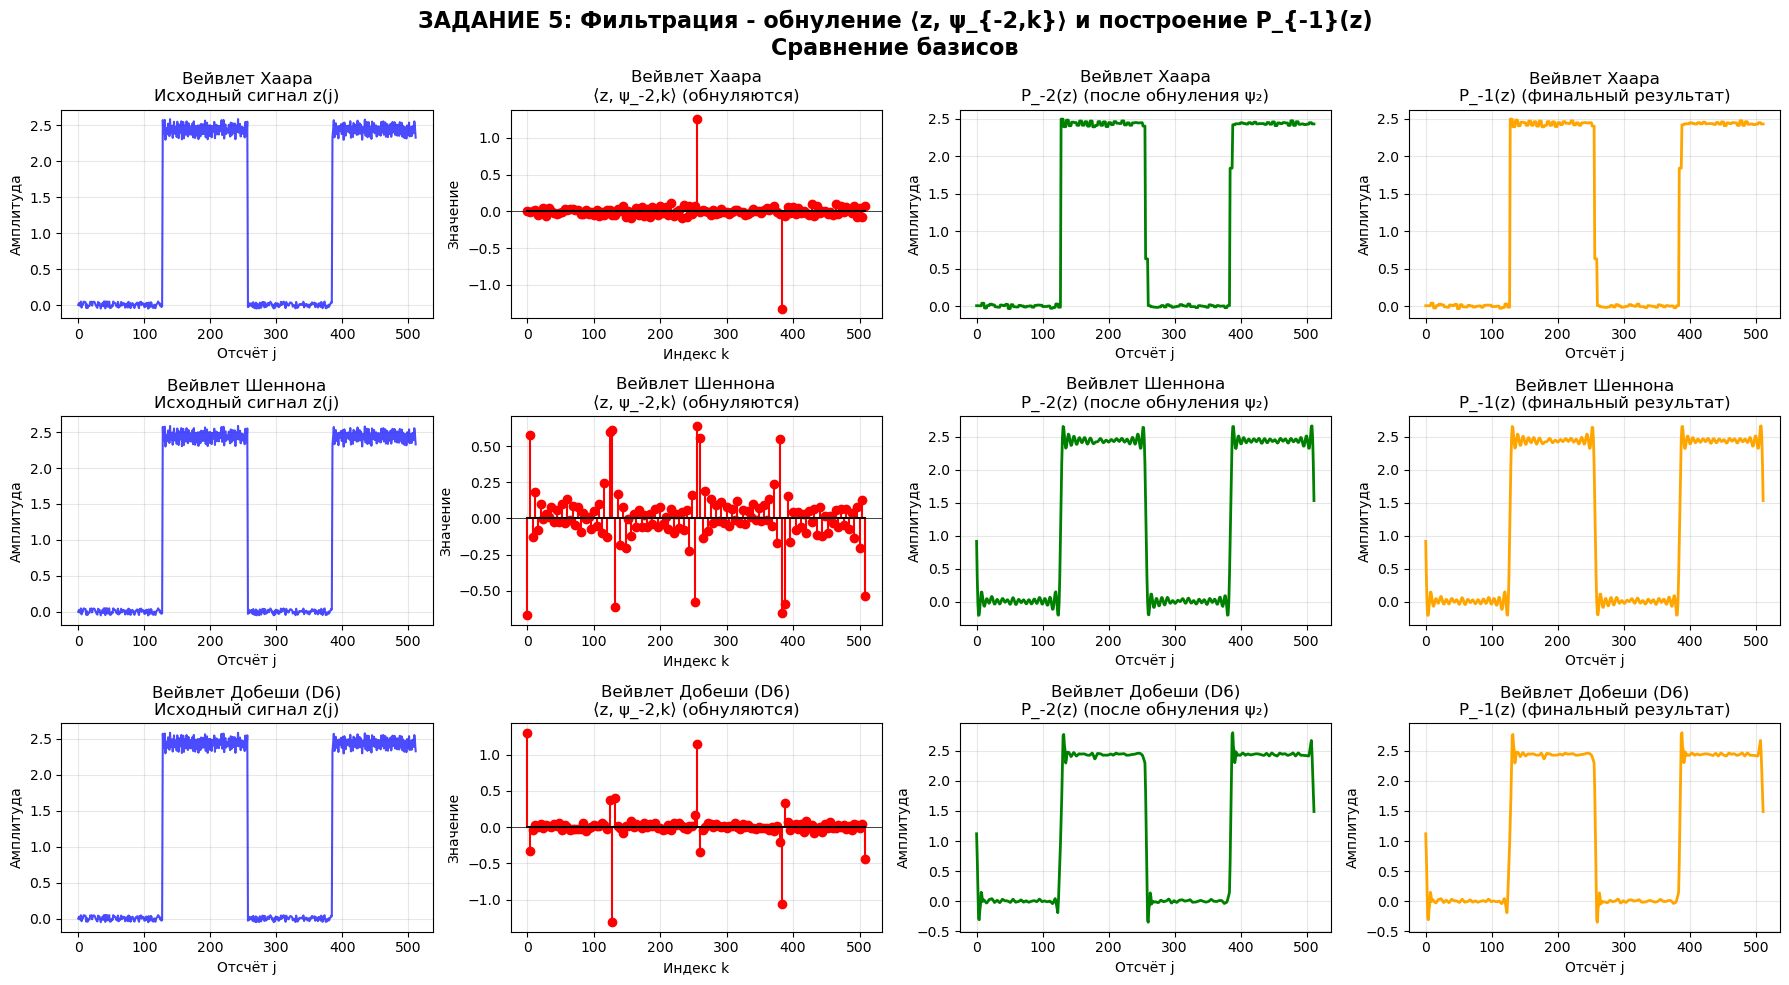

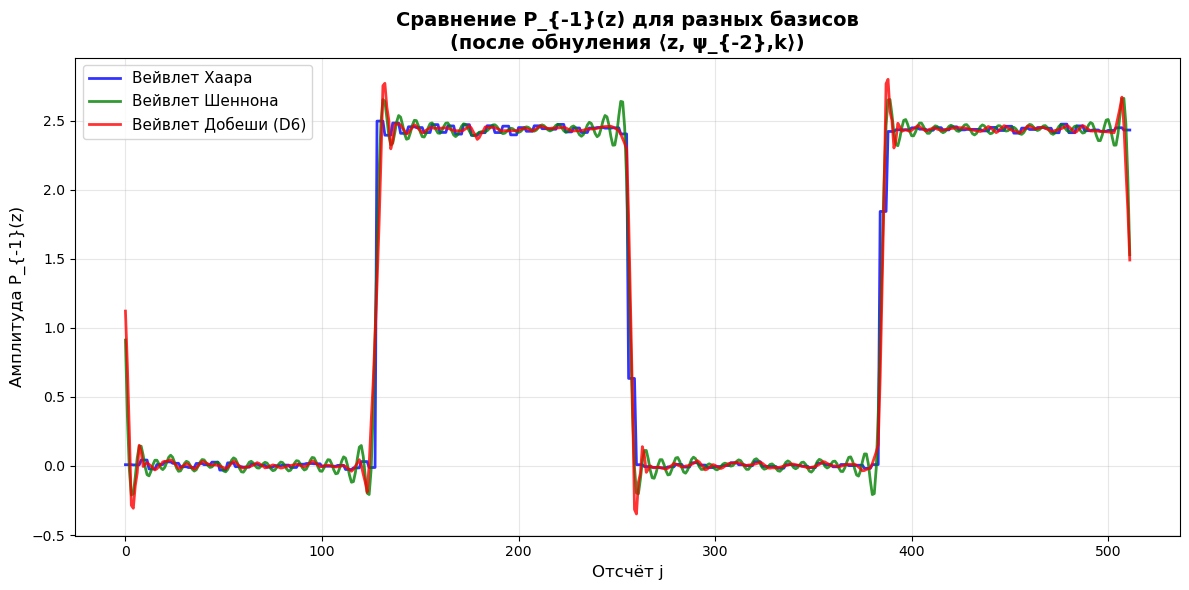

In [6]:
# ============================================================================
# ЗАДАНИЕ 5: Фильтрация - обнуление ⟨z, ψ_{-2,k}⟩ и построение P_{-1}(z)
# ============================================================================
fig, axes = plt.subplots(3, 4, figsize=(18, 10))
fig.suptitle("ЗАДАНИЕ 5: Фильтрация - обнуление ⟨z, ψ_{-2,k}⟩ и построение P_{-1}(z)\nСравнение базисов", 
             fontsize=16, fontweight='bold')

for row_idx, (basis_name, basis_title) in enumerate(WAVELET_BASES):
    # 1. Исходный зашумленный сигнал z(j)
    stage2_data = read_csv_file(f"filtering_results_{basis_name}_level2.csv")
    
    if stage2_data is not None:
        # График 1: Исходный сигнал z(j)
        axes[row_idx, 0].plot(stage2_data['sample_index'], stage2_data['original_real'], 
                             linewidth=1.5, color='blue', alpha=0.7)
        axes[row_idx, 0].set_title(f"{basis_title}\nИсходный сигнал z(j)")
        axes[row_idx, 0].set_xlabel("Отсчёт j")
        axes[row_idx, 0].set_ylabel("Амплитуда")
        axes[row_idx, 0].grid(True, alpha=0.3)
    
    # 2. ⟨z, ψ_{-2,k}⟩ коэффициенты (которые обнуляются)
    coeffs_data = read_csv_file(f"coeffs_initial_{basis_name}_level2.csv")
    
    if coeffs_data is not None:
        axes[row_idx, 1].stem(coeffs_data['sample_position'], coeffs_data['detail_real'],
                             linefmt='r-', markerfmt='ro', basefmt='k-')
        axes[row_idx, 1].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
        axes[row_idx, 1].set_title(f"{basis_title}\n⟨z, ψ_{-2},k⟩ (обнуляются)")
        axes[row_idx, 1].set_xlabel("Индекс k")
        axes[row_idx, 1].set_ylabel("Значение")
        axes[row_idx, 1].grid(True, alpha=0.3)
    
    # 3. P_{-2}(z) - сигнал после обнуления ψ_{-2} коэффициентов
    if stage2_data is not None:
        axes[row_idx, 2].plot(stage2_data['sample_index'], stage2_data['filtered_real'],
                             linewidth=2, color='green')
        axes[row_idx, 2].set_title(f"{basis_title}\nP_{-2}(z) (после обнуления ψ₂)")
        axes[row_idx, 2].set_xlabel("Отсчёт j")
        axes[row_idx, 2].set_ylabel("Амплитуда")
        axes[row_idx, 2].grid(True, alpha=0.3)
    
    # 4. P_{-1}(z) - финальный результат (что нужно по заданию!)
    pq_data = read_csv_file(f"projection_components_{basis_name}_level2.csv")
    
    if pq_data is not None:
        axes[row_idx, 3].plot(pq_data['sample_index'], pq_data['lowfreq_real'],
                             linewidth=2, color='orange')
        axes[row_idx, 3].set_title(f"{basis_title}\nP_{-1}(z) (финальный результат)")
        axes[row_idx, 3].set_xlabel("Отсчёт j")
        axes[row_idx, 3].set_ylabel("Амплитуда")
        axes[row_idx, 3].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# Сравнение P_{-1}(z) для всех базисов (для анализа точности)
# ============================================================================

fig, ax = plt.subplots(figsize=(12, 6))
colors = ['blue', 'green', 'red']

accuracy_results = []
for idx, (basis_name, basis_title) in enumerate(WAVELET_BASES):
    pq_data = read_csv_file(f"projection_components_{basis_name}_level2.csv")
    stage2_data = read_csv_file(f"filtering_results_{basis_name}_level2.csv")
    
    if pq_data is not None and stage2_data is not None:
        # Отображение P_{-1}(z)
        ax.plot(pq_data['sample_index'], pq_data['lowfreq_real'],
               linewidth=2, color=colors[idx], label=basis_title, alpha=0.8)
        
        # Вычисление точности
        original = stage2_data['original_real'].values
        p1_signal = pq_data['lowfreq_real'].values
        
        # Особенно важна точность на границах разрывов
        boundaries = [128, 256, 384]  # Границы кусочков
        boundary_errors = []
        for boundary in boundaries:
            if boundary < len(original):
                error = abs(original[boundary] - p1_signal[boundary])
                boundary_errors.append(error)
        
        max_boundary_error = max(boundary_errors) if boundary_errors else 0

ax.set_title("Сравнение P_{-1}(z) для разных базисов\n(после обнуления ⟨z, ψ_{-2},k⟩)", 
             fontsize=14, fontweight='bold')
ax.set_xlabel("Отсчёт j", fontsize=12)
ax.set_ylabel("Амплитуда P_{-1}(z)", fontsize=12)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Анализ гармонического сигнала из директории: wavelet_results_harmonic


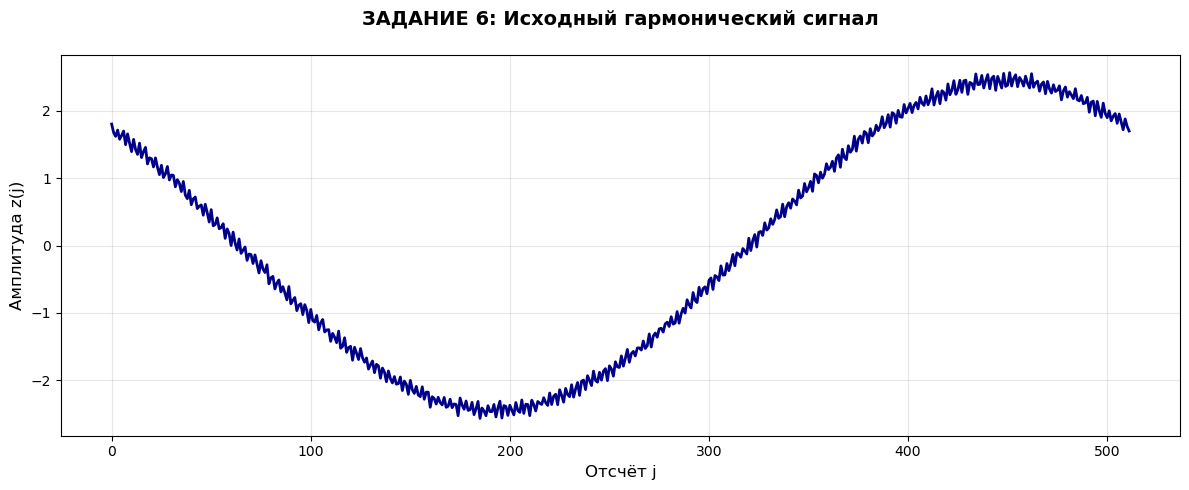

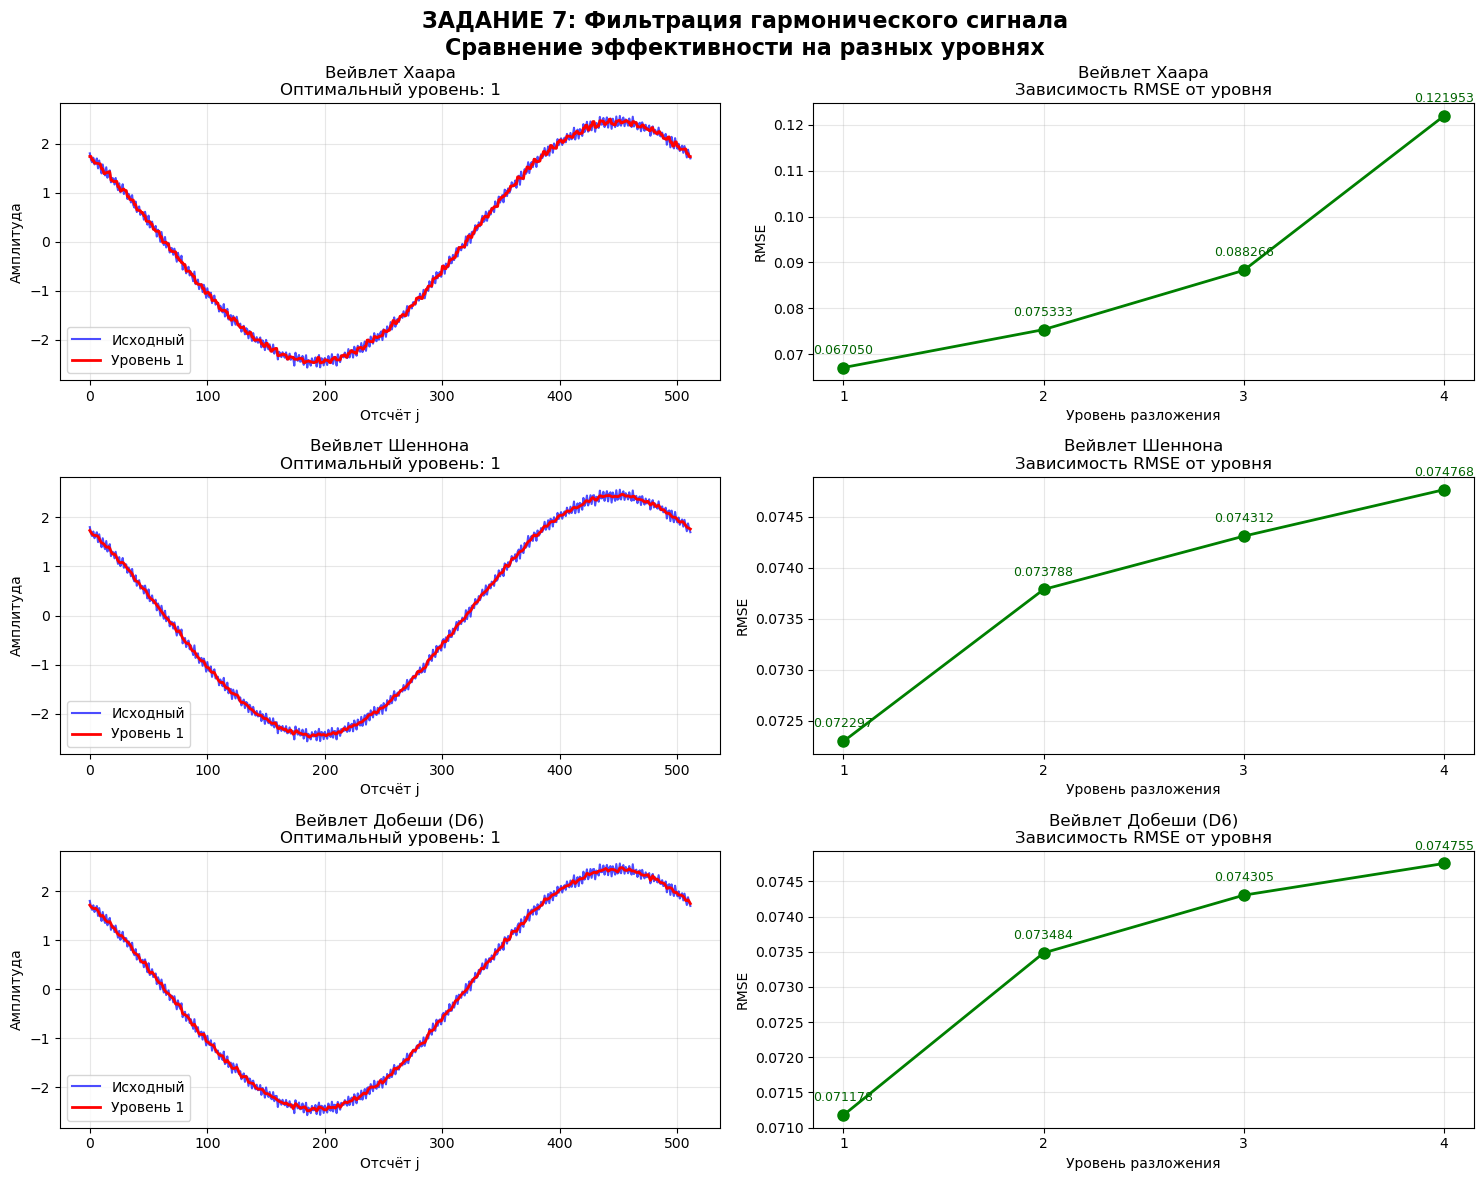

In [7]:
# ============================================================================
# ЗАДАНИЕ 6: Анализ гармонического сигнала
# ============================================================================

# Директория с результатами гармонического сигнала
HARMONIC_DIR = "wavelet_results_harmonic"

if not os.path.exists(HARMONIC_DIR):
    print(f"Директория '{HARMONIC_DIR}' не найдена!")
    print("Сначала запустите C++ программу для генерации гармонического сигнала")
else:
    print(f"Анализ гармонического сигнала из директории: {HARMONIC_DIR}")
    
    def read_csv_harmonic(filename):
        """Чтение CSV файла для гармонического сигнала"""
        filepath = os.path.join(HARMONIC_DIR, filename)
        if os.path.exists(filepath):
            return pd.read_csv(filepath)
        return None
    
    # 1. Исходный гармонический сигнал
    harmonic_signal = read_csv_harmonic("original_signal.csv")
    if harmonic_signal is not None:
        fig, ax = plt.subplots(figsize=(12, 5))
        ax.plot(harmonic_signal['sample_index'], harmonic_signal['real_component'], 
               linewidth=2, color='darkblue')
        ax.set_title("ЗАДАНИЕ 6: Исходный гармонический сигнал\n",
                    fontsize=14, fontweight='bold')
        ax.set_xlabel("Отсчёт j", fontsize=12)
        ax.set_ylabel("Амплитуда z(j)", fontsize=12)
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    best_stages_results = []
    
    for basis_name, basis_title in WAVELET_BASES:
        
        # Анализ ошибок на разных уровнях
        level_errors = []
        
        for level in [1, 2, 3, 4]:
            data = read_csv_harmonic(f"filtering_results_{basis_name}_level{level}.csv")
            if data is not None:
                original = data['original_real'].values
                filtered = data['filtered_real'].values
                
                mse = np.mean((original - filtered) ** 2)
                rmse = np.sqrt(mse)
                level_errors.append({
                    'Уровень': level,
                    'MSE': mse,
                    'RMSE': rmse
                })
        
        # Находим оптимальный уровень для этого базиса
        if level_errors:
            optimal_level = min(level_errors, key=lambda x: x['MSE'])
            best_stages_results.append({
                'Базис': basis_title,
                'Оптимальный уровень': optimal_level['Уровень'],
                'RMSE': optimal_level['RMSE']
            })
    
    # Визуализация сравнения
    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle("ЗАДАНИЕ 7: Фильтрация гармонического сигнала\nСравнение эффективности на разных уровнях", 
                 fontsize=16, fontweight='bold')
    
    for row_idx, (basis_name, basis_title) in enumerate(WAVELET_BASES):
        # График 1Сравнение сигналов на оптимальном уровне
        optimal_level = None
        for result in best_stages_results:
            if result['Базис'] == basis_title:
                optimal_level = result['Оптимальный уровень']
                break
        
        if optimal_level:
            data = read_csv_harmonic(f"filtering_results_{basis_name}_level{optimal_level}.csv")
            if data is not None:
                axes[row_idx, 0].plot(data['sample_index'], data['original_real'], 
                                     linewidth=1.5, alpha=0.7, color='blue', label='Исходный')
                axes[row_idx, 0].plot(data['sample_index'], data['filtered_real'], 
                                     linewidth=2, color='red', label=f'Уровень {optimal_level}')
                axes[row_idx, 0].set_title(f"{basis_title}\nОптимальный уровень: {optimal_level}", 
                                          fontsize=12)
                axes[row_idx, 0].set_xlabel("Отсчёт j")
                axes[row_idx, 0].set_ylabel("Амплитуда")
                axes[row_idx, 0].legend(fontsize=10)
                axes[row_idx, 0].grid(True, alpha=0.3)
        
        # График Зависимость RMSE от уровня
        rmse_values = []
        levels = []
        
        for level in [1, 2, 3, 4]:
            data = read_csv_harmonic(f"filtering_results_{basis_name}_level{level}.csv")
            if data is not None:
                original = data['original_real'].values
                filtered = data['filtered_real'].values
                mse = np.mean((original - filtered) ** 2)
                rmse = np.sqrt(mse)  # Вычисляем RMSE
                rmse_values.append(rmse)
                levels.append(level)
        
        axes[row_idx, 1].plot(levels, rmse_values, marker='o', linewidth=2, markersize=8, color='green')
        axes[row_idx, 1].set_title(f"{basis_title}\nЗависимость RMSE от уровня", fontsize=12)
        axes[row_idx, 1].set_xlabel("Уровень разложения")
        axes[row_idx, 1].set_ylabel("RMSE")
        axes[row_idx, 1].set_xticks([1, 2, 3, 4])
        axes[row_idx, 1].grid(True, alpha=0.3)
        
        # Подписываем значения RMSE на графике
        for i, (level, rmse_val) in enumerate(zip(levels, rmse_values)):
            axes[row_idx, 1].annotate(f'{rmse_val:.6f}', 
                                     xy=(level, rmse_val),
                                     xytext=(0, 10),
                                     textcoords='offset points',
                                     ha='center',
                                     fontsize=9,
                                     color='darkgreen')
    
    plt.tight_layout()
    plt.show()